**SEGUNDA ENTREGA PROYECTO FINAL** - Gerson Molina.
---------

En las últimas dos décadas, la industria del comercio electrónico ha experimentado una transformación radical. Hacia el año 2010, los marketplaces digitales como Amazon comenzaron a consolidar una masividad considerable. En el camino hacia 2015, las redes sociales se afirmaron como canales de referencia y moldeadores del comportamiento del usuario. En los años subsiguientes, empresas de todas las industrias comenzaron, en diferentes escalas, a transformar digitalmente sus modelos de servicio. Sin embargo, la gran aceleración se produjo hacia el 2020, cuando la pandemia de COVID-19 forzó a los consumidores rezagados de todo el mundo a adaptar su comportamiento y, en última instancia, a volcarse inevitablemente hacia el comercio electrónico.

Si bien todo este movimiento hacia las compras en línea siempre fue evidente en países occidentales, la velocidad de adopción en naciones más allá de la cortina de Occidente no era tan clara ni consistente. Aunque países como Japón y China lideraron la adopción temprana de soluciones digitales, existía poca claridad sobre cómo se comportaban otras poblaciones masivas.

Paralelamente a esta transformación digital, el panorama global también ha sido testigo de cambios significativos, con naciones emergentes de Asia, como India y China, ascendiendo para convertirse en nuevas potencias económicas. Este fenómeno plantea una interrogante de gran envergadura: ¿cuál ha sido el impacto de la industria del comercio electrónico occidental en territorios históricamente cerrados a la globalización? ¿Se ha producido la misma aceleración digital en estos países tras la pandemia? ¿Hasta qué punto podemos proyectar la adopción digital de consumidores orientales, considerando que a este ritmo, los próximos 10 años verán en estos mercados un terreno de expansión global tan seductor como imperativo?
Con ese desafío en mente, me propuse examinar de cerca el impacto del comercio electrónico en la India, una de las grandes promesas de la próxima década. El caso de estudio se centra en las ventas de Amazon, como líder mundial del comercio electrónico; tomando una partición  de datos del 2022: los suficientemente actual para retratar un escenario post pandemia. A través de este análisis, aspiro a arrojar luz sobre el fenómeno global del comercio electrónico y cómo ha influido en las economías y sociedades de regiones anteriormente menos exploradas en este contexto.

La audiencia de este reporte es un stakeholder estratégico de una compañía global con miras de expandir su operación a la India, ingresando a través del canal electrónico. Tomando los datos de Amazon como referente, aspiro a responder algunas interrogantes básicas sobre cómo se comporta ese mercado y cuáles pueden ser las potenciales puertas de entrada.

Desde los stakeholders que buscan  insights para tomar decisiones estratégicas a los vendedores que desean comprender mejor el mercado indio en base al e-Commerce y a cualquiera interesado en el auge del comercio electrónico en la India. Los hallazgos aquí presentados pueden proporcionar información valiosa para futuras estrategias comerciales

In [169]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import os
import datetime as dt
import seaborn as sns

sns.set(style="darkgrid")
dark_palette = sns.dark_palette("#d90429", as_cmap=True)

In [170]:
ruta = '/Users/Gerson/Desktop/Data-Science.'
os.chdir(ruta)

df = pd.read_excel("Amazon_Sales_Report.xlsx")

In [171]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [173]:
df.duplicated().value_counts()

False    128975
Name: count, dtype: int64

In [174]:
nulos = df.isnull().sum()
nulos_pct = nulos / df.shape[0]
nulos_resumen = pd.DataFrame({'Cant_Nulos': nulos, 'Pct_Nulos': nulos_pct})
nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0, :]
nulos_resumen = nulos_resumen.sort_values(by='Cant_Nulos', ascending=False)
nulos_resumen

,Cant_Nulos,Pct_Nulos
fulfilled-by,89699,0.695476
promotion-ids,49160,0.381159
currency,7795,0.060438
Amount,7795,0.060438
Courier Status,6872,0.053282
ship-state,40,0.000310
ship-postal-code,40,0.000310
ship-country,40,0.000310
ship-city,33,0.000256
B2B,7,0.000054


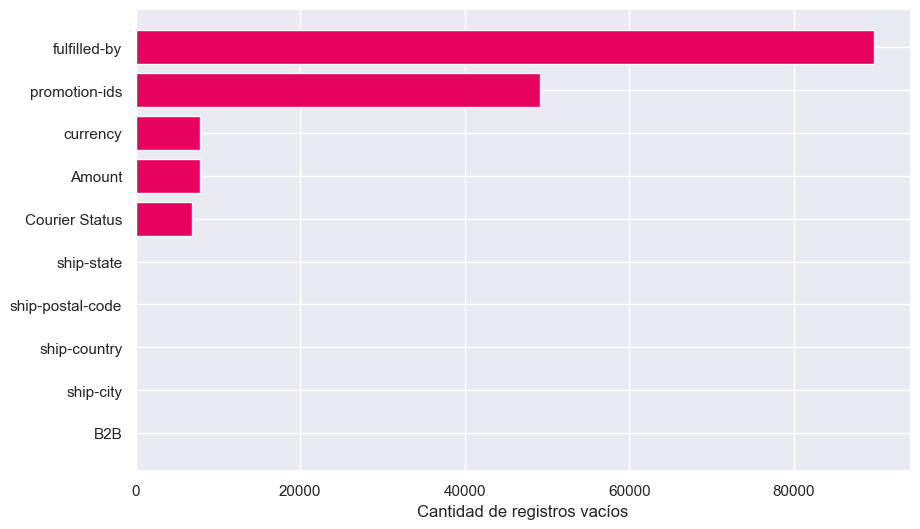

In [175]:
plt.figure(figsize=(10,6))
plt.barh(nulos_resumen.index, 
         nulos_resumen['Cant_Nulos'],
         color = '#E70260')
plt.xlabel('Cantidad de registros vacíos')
plt.gca().invert_yaxis()  
plt.show()

In [176]:
df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-postal-code'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

df.dropna(subset=['currency', 'Amount'], inplace=True)

valores_faltantes_columnas = ["B2B", "fulfilled-by"]
datos_faltantes = df[valores_faltantes_columnas].isnull()

imputer = SimpleImputer(strategy='most_frequent')

df[valores_faltantes_columnas] = imputer.fit_transform(df[valores_faltantes_columnas])

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4030/1860494555.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No especificado' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['ship-postal-code'].fillna('No especificado', inplace=True)


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121180 non-null  int64  
 1   Order ID            121180 non-null  object 
 2   Date                121180 non-null  object 
 3   Status              121180 non-null  object 
 4   Fulfilment          121180 non-null  object 
 5   ship-service-level  121180 non-null  object 
 6   Style               121180 non-null  object 
 7   SKU                 121180 non-null  object 
 8   Category            121180 non-null  object 
 9   Size                121180 non-null  object 
 10  ASIN                121180 non-null  object 
 11  Courier Status      121180 non-null  object 
 12  Qty                 121180 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           121180 non-null  ob

Efectivamente los cambios que se realizaron en la limpieza de los datos surtieron efecto, por lo que el conjunto de los datos quedan comprendidos en 21 columnas y 121.180 registros.

In [178]:
#Verificamos que en efecto no existan valores nulos.
df.isnull().value_counts()

index  Order ID  Date   Status  Fulfilment  ship-service-level  Style  SKU    Category  Size   ASIN   Courier Status  Qty    currency  Amount  ship-city  ship-state  ship-postal-code  ship-country  promotion-ids  B2B    fulfilled-by
False  False     False  False   False       False               False  False  False     False  False  False           False  False     False   False      False       False             False         False          False  False           121180
Name: count, dtype: int64

In [179]:
#convertimos el campo date en formato fecha.
df['Date']=pd.to_datetime(df['Date'])

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4030/4005634946.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121180 non-null  int64         
 1   Order ID            121180 non-null  object        
 2   Date                121180 non-null  datetime64[ns]
 3   Status              121180 non-null  object        
 4   Fulfilment          121180 non-null  object        
 5   ship-service-level  121180 non-null  object        
 6   Style               121180 non-null  object        
 7   SKU                 121180 non-null  object        
 8   Category            121180 non-null  object        
 9   Size                121180 non-null  object        
 10  ASIN                121180 non-null  object        
 11  Courier Status      121180 non-null  object        
 12  Qty                 121180 non-null  int64         
 13  currency            121180 non-nul

**CUAL FUE EL MES CON LA VENTA MAS ALTA**

In [181]:
#Extraer el mes.
df['Mes']=df['Date'].dt.month

#Realizamos la multiplicación de precio por cantidad. 
df['Total Ventas']=df['Qty']*df['Amount']

In [182]:
df_mes=df.groupby('Mes')['Total Ventas'].sum()

#Resetear Mes.
df_mes=df_mes.reset_index()

In [183]:
df_mes

,Mes,Total Ventas
0,1,2803434.0
1,2,2919029.0
2,3,2962365.0
3,4,19729926.0
4,5,17214499.0
5,6,14826227.0
6,7,2725080.0
7,8,2757792.0
8,9,2647720.0
9,10,2529449.0


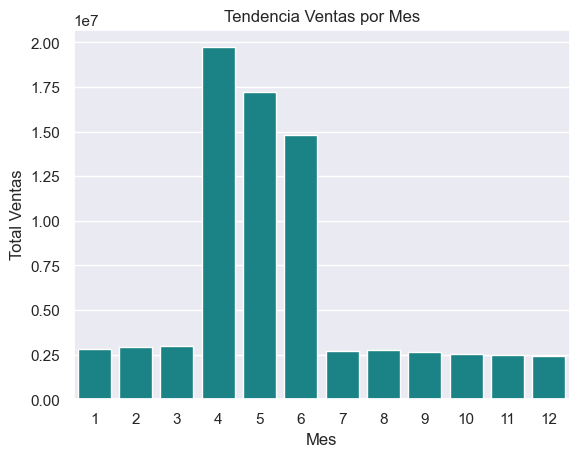

In [184]:
sns.barplot(x='Mes', y='Total Ventas', data=df_mes, color='#0a9396')
plt.title('Tendencia Ventas por Mes')
plt.xlabel('Mes')
plt.show()


Las ventas se observan amesetadas a lo largo del año, excepto un pico durante los meses de verano (Abril, Mayo, Junio), que registran hasta 6 veces mas las ventas, lo cual puede deberse a estacionalidad. Siendo Abril el mes con mayor cantidad de ventas.

**CUAL FUE LA CIUDAD CON MAYOR VENTA**

In [185]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Mes,Total Ventas
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,No especificado,False,Easy Ship,4,0.0
1,1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,4,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,4,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No especificado,False,Easy Ship,4,0.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,No especificado,False,Easy Ship,4,574.0


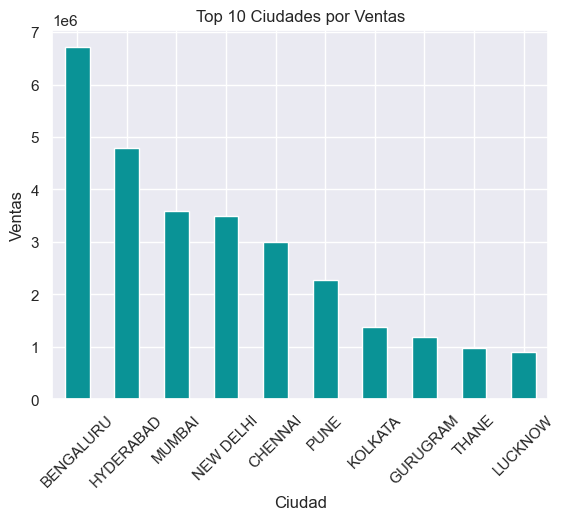

In [186]:
ventas_por_ciudad = df.groupby('ship-city')['Total Ventas'].sum()

# Ordenar los datos para una mejor visualización
ventas_por_ciudad = ventas_por_ciudad.sort_values(ascending=False)

# Crear un gráfico de barras
ventas_por_ciudad.head(10).plot(kind='bar', color='#0a9396')
plt.title('Top 10 Ciudades por Ventas')
plt.xlabel('Ciudad')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

Podemos determinar que la mayor cantidad de ventas se concentran en ciudades como Bengaluru, Hhyderabad y Mumbai.

In [187]:
ventas_por_categoria = df.groupby(['Category', 'Mes'])['Total Ventas'].sum().reset_index()

ventas_por_categoria


,Category,Mes,Total Ventas
0,Blouse,1,19696.0
1,Blouse,2,15594.0
2,Blouse,3,17022.0
3,Blouse,4,128091.0
4,Blouse,5,93046.0
...,...,...,...
92,kurta,8,737013.0
93,kurta,9,758519.0
94,kurta,10,685590.0
95,kurta,11,654970.0


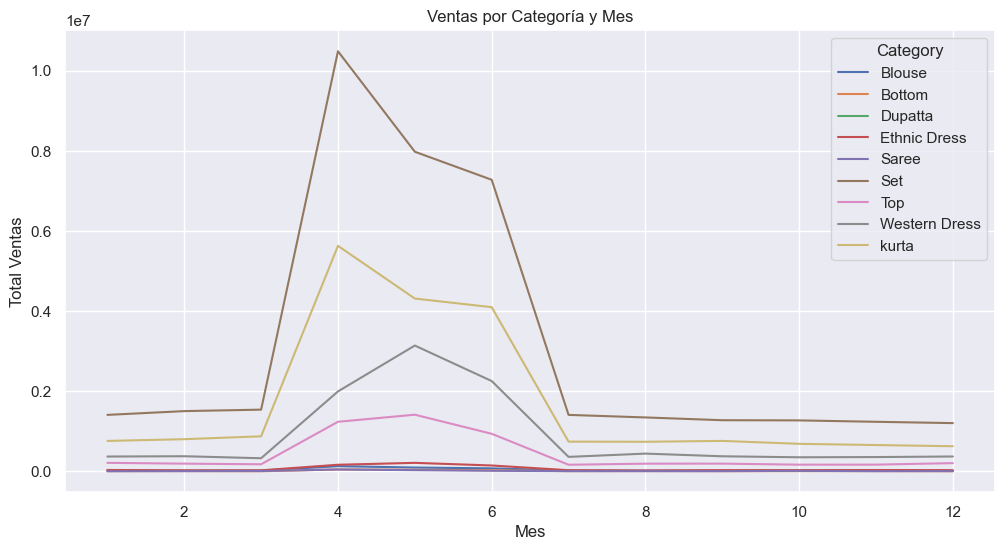

In [188]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Total Ventas', hue='Category', data=ventas_por_categoria)
plt.title('Ventas por Categoría y Mes')
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.show()

Vemos una fuerte tendencia en la venta por categoría en función de los meses, siendo de manera permanente a lo largo del tiempo las categorías "SET", "Kurta" y "Western Dress" los productos mas vendidos.

In [189]:
pedidos_cancelados = df[df['Status'] == 'Cancelled']
pedidos_enviados = df[df['Status'] == 'Shipped']

# Calculamos la cantidad de pedidos cancelados y enviados
cantidad_pedidos_cancelados = len(pedidos_cancelados)
cantidad_pedidos_enviados = len(pedidos_enviados)

# Calculamos la proporción
proporcion_cancelados_vs_enviados = cantidad_pedidos_cancelados / cantidad_pedidos_enviados

print(f"Proporción de pedidos cancelados respecto a los enviados: {proporcion_cancelados_vs_enviados:.2%}")

Proporción de pedidos cancelados respecto a los enviados: 9.85%


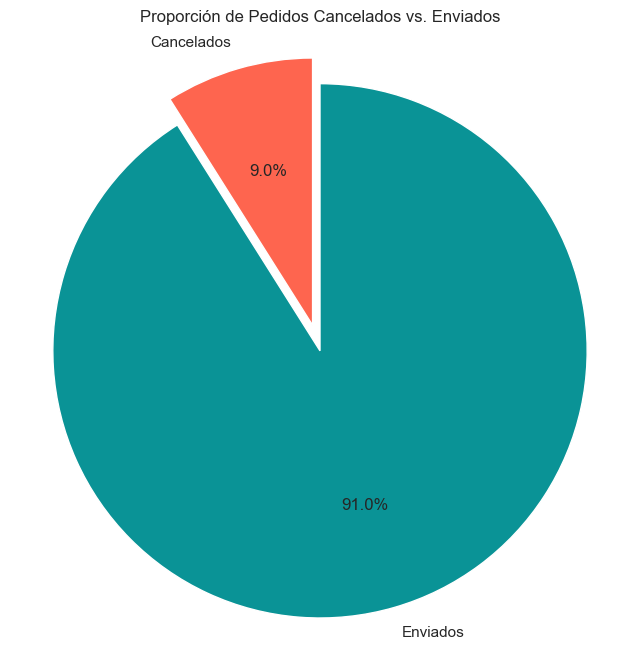

In [190]:
# Gráficamos

cantidades = [cantidad_pedidos_cancelados, cantidad_pedidos_enviados]
etiquetas = ['Cancelados', 'Enviados']
colores = ['#fe654f','#0a9396']

# Destacamos la parte de pedidos cancelados
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Proporción de Pedidos Cancelados vs. Enviados')
plt.axis('equal')
plt.show()